In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = {'Date': ['2019-01-01', '2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28', '2019-02-04','2019-02-11', '2019-02-18', '2019-02-25','2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25', '2019-04-01', '2019-04-07', '2019-04-14', '2019-04-21',
                 '2019-04-28', '2019-05-05', '2019-05-12','2019-05-19','2019-05-26','2019-06-02','2019-06-09','2019-06-16','2019-06-23','2019-06-30',
                 '2019-07-07','2019-07-14','2019-07-21','2019-07-28','2019-08-04','2019-08-11','2019-08-18','2019-08-25','2019-09-01','2019-09-08','2019-09-15','2019-09-22','2019-09-29','2019-10-06','2019-10-13','2019-10-20','2019-10-27','2019-11-03',
                 '2019-11-10','2019-11-17','2019-11-24','2019-12-01','2019-12-08','2019-12-15','2019-12-22','2019-12-29', '2020-01-05', '2020-01-12', '2020-01-19', '2019-01-26', '2020-02-02','2020-02-09', '2020-02-16', '2020-02-23',
                 '2020-03-01', '2020-03-08', '2020-03-15','2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
                 '2020-06-14', '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
                 '2020-10-04', '2020-10-11', '2020-10-18','2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27',
                 '2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
                 '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16', '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13', '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11', '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
                 '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03', '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28',
                 '2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26'],
                      'Servers': [521, 1683, 2037, 974, 966, 1541, 1085, 1505, 1193, 1407, 878, 835, 593, 1184, 1265, 831, 686, 797, 1030, 1280, 1074, 618, 387, 446, 636, 548, 472, 863, 557, 904, 640, 655, 832, 606, 859,
                                  269, 839, 421, 400, 307, 535, 358, 467, 442, 324, 555, 490, 282, 357, 458, 359, 53, 142, 758,  521, 455, 438, 326, 403, 516, 443, 478, 305, 563, 340, 413, 675, 485, 180, 165, 143, 237, 295, 320, 439,
                                  448, 435, 140, 184, 326, 407, 533, 332, 244, 424, 439, 350, 226, 378, 308, 239, 303, 321, 416, 166, 357, 241, 412, 343, 90, 242, 373, 352, 181, 73, 279, 387, 523, 592, 342, 396, 1116, 375, 340, 395, 254,
                                  325, 215, 198, 405, 241, 190, 249, 201, 286, 282, 265, 185, 231, 188, 219, 217, 125, 314, 100, 216, 320, 179, 360, 167, 220, 261, 245, 245, 202, 461, 222, 189, 232, 210, 147, 47, 153, 120, 131, 57, 14]}



df = pd.DataFrame(data)

print(df)

           Date  Servers
0    2019-01-01      521
1    2019-01-07     1683
2    2019-01-14     2037
3    2019-01-21      974
4    2019-01-28      966
..          ...      ...
152  2021-11-28      153
153  2021-12-05      120
154  2021-12-12      131
155  2021-12-19       57
156  2021-12-26       14

[157 rows x 2 columns]


In [4]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')

<Axes: xlabel='Date'>

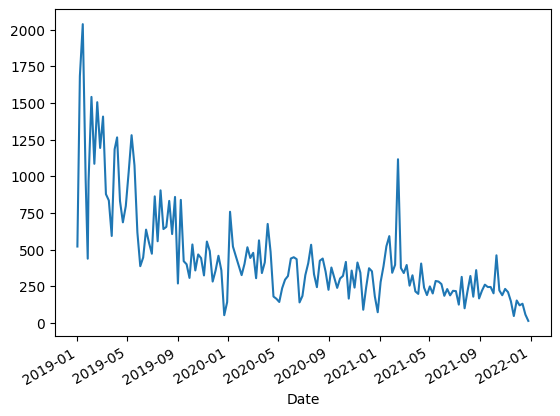

In [6]:
import matplotlib.pyplot as plt
Servers = df['Servers']
Servers.plot()